In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation 
import matplotlib.animation as animation
import sys 

# We need to solve this once and for all
sys.path.append('/Users/sdea/Coding/pyCASINO/src')

import functions
from datamodels import Pos

In [2]:
# Here we want to test the mambo-jambo 
P_current = Pos(1, 0)
theta_deg = 10
theta = np.deg2rad(theta_deg)

In [3]:
# Parameters for silicon 
N_electrons = 100
E = 30          # keV 
Z = 14          # Silicon 
A = 28.0855     # Atomic weight (g/mol) 
rho = 2.33      # Density (g/cm3)

In [7]:
# Make the loop for one electron 
x_list = []
y_list = []
E_list = []
theta_list = []
step_list = []

x_new = 0
y_new = 0
x_current = 0
y_current = 0
P_new = P_current
E_new = E
E_current = E

for i in range(1, 100):
    
    alpha = functions.compute_alpha(E_current, Z)
    sigma = functions.compute_sigma(E_current, Z, alpha)
    lambda_mean = functions.compute_lambda(A, rho, sigma)
    step = functions.compute_step(lambda_mean)
    theta = functions.compute_scatt_angle(alpha)
    
    P_current = functions.compute_next_P(P_current, theta)
    x_new = x_current + step * P_current.rx
    y_new = y_current + step * P_current.ry

    E_loss = functions.compute_energy_loss(Z, E_current, rho, A, step)
    E_current = E_current + E_loss

    if E_current < 0.1:
        break
    else:
        print(P_current.rx, P_current.ry)
        x_list.append(x_new)
        y_list.append(y_new)
        E_list.append(E_current)
        theta_list.append(theta)
        step_list.append(step)





0.9949748961551481 -0.10012470235187693
0.9925958944764629 -0.12146353472738314
0.9811576555521905 -0.19320883766362446
0.9927389770119794 -0.12028850120110503
0.943159547836984 0.3323402884453459
0.9461016584808494 0.3238698068974416
0.9586436790341148 0.2846090241857011
0.9259508341599502 0.3776440820647033
0.9344263082444804 0.35615653084085286
0.9068163121012656 0.4215260088144741
0.9990179196368798 0.04430797043874535
0.9999938294926225 -0.0035129726272325468
0.9948917338940311 -0.10094769848455375
0.9960386966046209 -0.08892083482608593
0.9936273960216114 -0.1127146746227473
0.9819783301042802 -0.18899354276167546
0.9864327585171772 -0.16416580924233956
0.9913562996362631 -0.13119713095756072
0.9960894745982524 -0.08835020427015078
0.9879560569665673 -0.1547347068471473
0.9904474123730537 -0.1378909834743445
0.9682393471975177 -0.25002513181383335
0.9774662588004773 -0.21109171681190686
0.9884765152479159 -0.15137430033971025
0.99151236569949 -0.13001241734927046
0.99999931329362

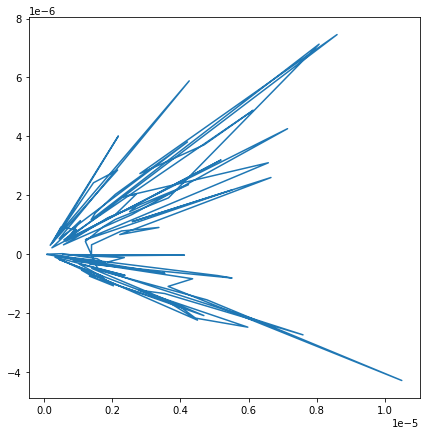

In [6]:
plt.figure(figsize=(7,7))
plt.plot(x_list, y_list, '-')
plt.show() 


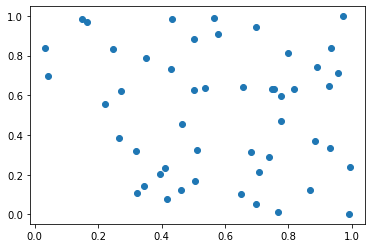